In [609]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load raw data
df = pd.read_csv(r"C:\PROJECTS\Healthcare_Readmission_Analytics\dataset\hospital_readmissions_raw.csv")
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [610]:
# Basic inspection
df.shape

(25000, 17)

In [611]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [613]:
df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [614]:
df.columns = df.columns.str.lower()

In [615]:
# Convert Age Ranges → Numeric
df['age'] = df['age'].str.extract(r'(\d+)-(\d+)').astype(float).mean(axis=1)


In [616]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in medical_specialty:
medical_specialty
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: count, dtype: int64

Unique values in diag_1:
diag_1
Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: count, dtype: int64

Unique values in diag_2:
diag_2
Other              9056
Circulatory        8134
Diabetes           2906
Respiratory        2872
Digestive           973
Injury              591
Musculoskeletal     426
Missing              42
Name: count, dtype: int64

Unique values in diag_3:
diag_3
Other              9107
Circulatory        7686
Diabetes           4261
Respiratory        1915
Digestive           916
Injury              464
Musculoskeletal 

### VISUALIZATION

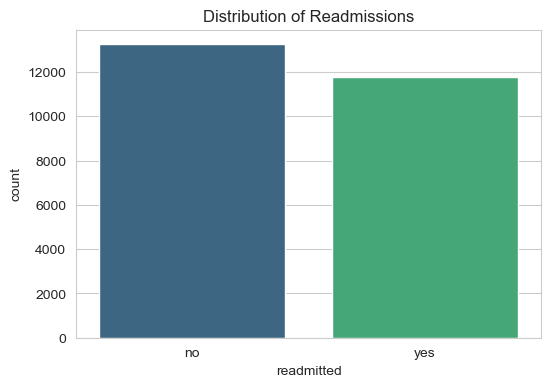

In [617]:
# Visualization 1: Distribution of Readmitted (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='readmitted', palette='viridis')
plt.title('Distribution of Readmissions')
plt.show()

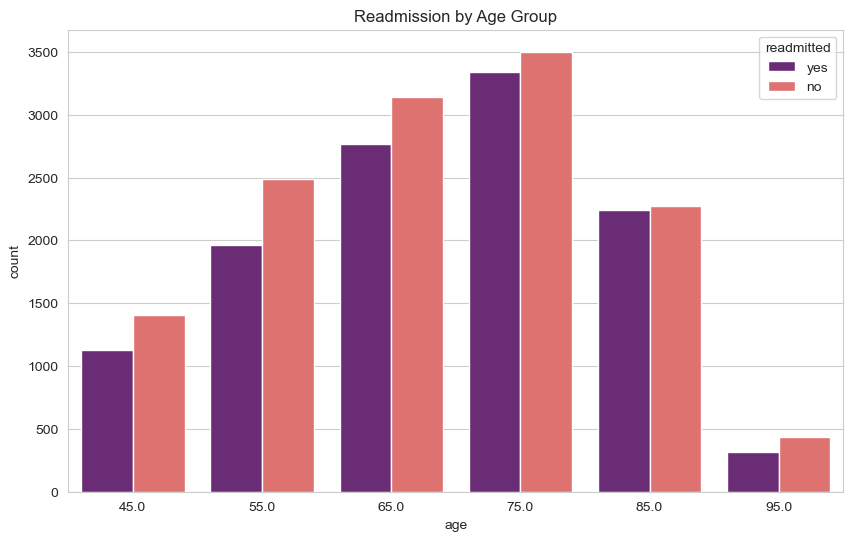

In [618]:
# Visualization 2: Readmission rate by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age', hue='readmitted', palette='magma', order=sorted(df['age'].unique()))
plt.title('Readmission by Age Group')
plt.show()

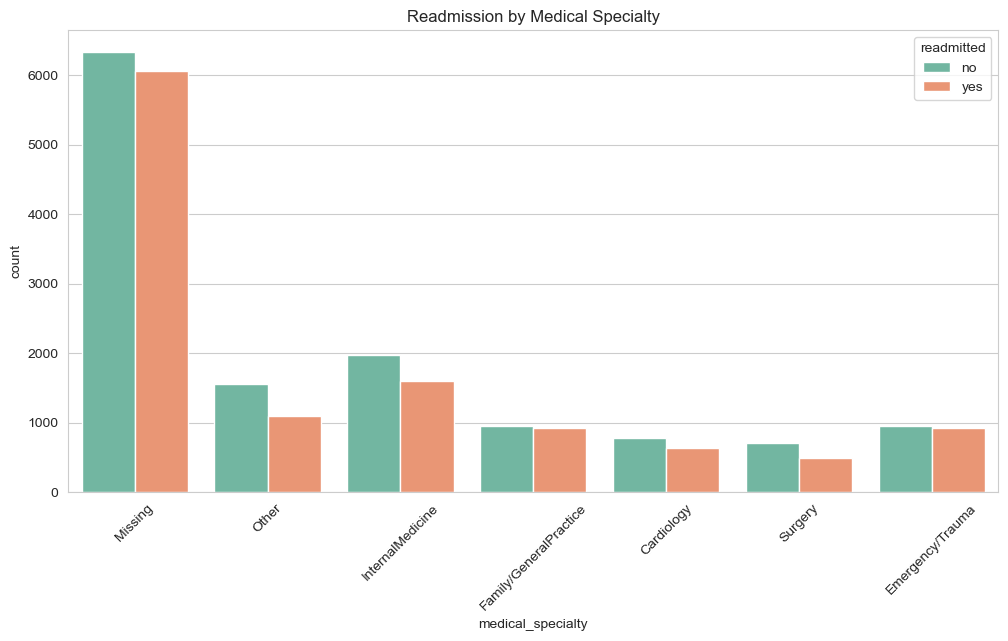

In [619]:
# Visualization 3: Readmission rate by Medical Specialty (Top specialties)
plt.figure(figsize=(12, 6))
# Filter for readability or just plot all since there are only 7 unique
sns.countplot(data=df, x='medical_specialty', hue='readmitted', palette='Set2')
plt.title('Readmission by Medical Specialty')
plt.xticks(rotation=45)
plt.show()

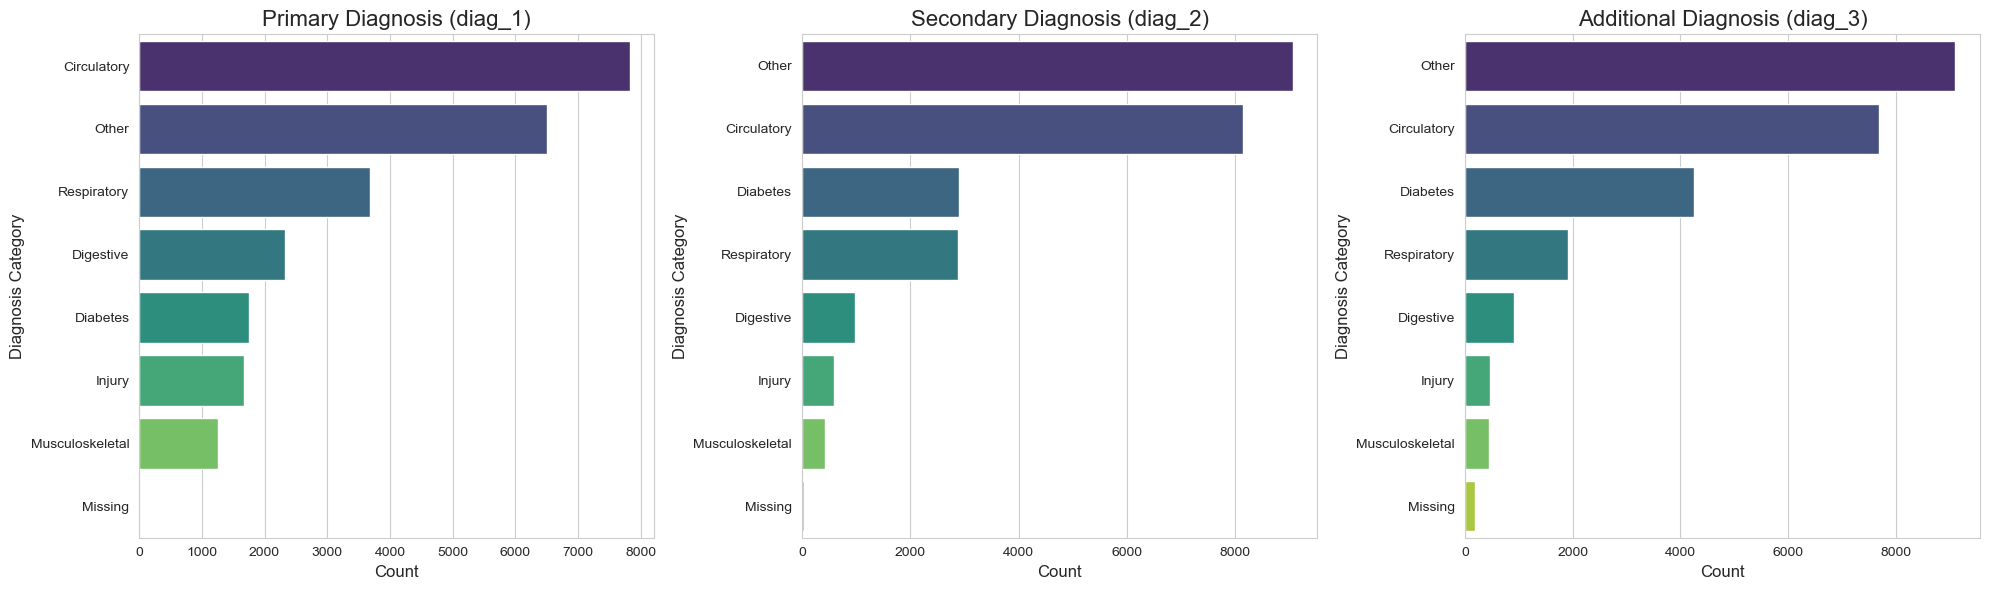

In [620]:
# Visualization 4: Diagnosis Distributions Analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Define the columns to visualize
diag_columns = ['diag_1', 'diag_2', 'diag_3']
titles = ['Primary Diagnosis (diag_1)', 'Secondary Diagnosis (diag_2)', 'Additional Diagnosis (diag_3)']

for i, col in enumerate(diag_columns):
    # Get counts and sort them
    order = df[col].value_counts().index
    
    # Create the countplot
    sns.countplot(data=df, y=col, ax=axes[i], order=order, palette='viridis')
    
    # Set titles and labels
    axes[i].set_title(titles[i], fontsize=16)
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].set_ylabel('Diagnosis Category', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

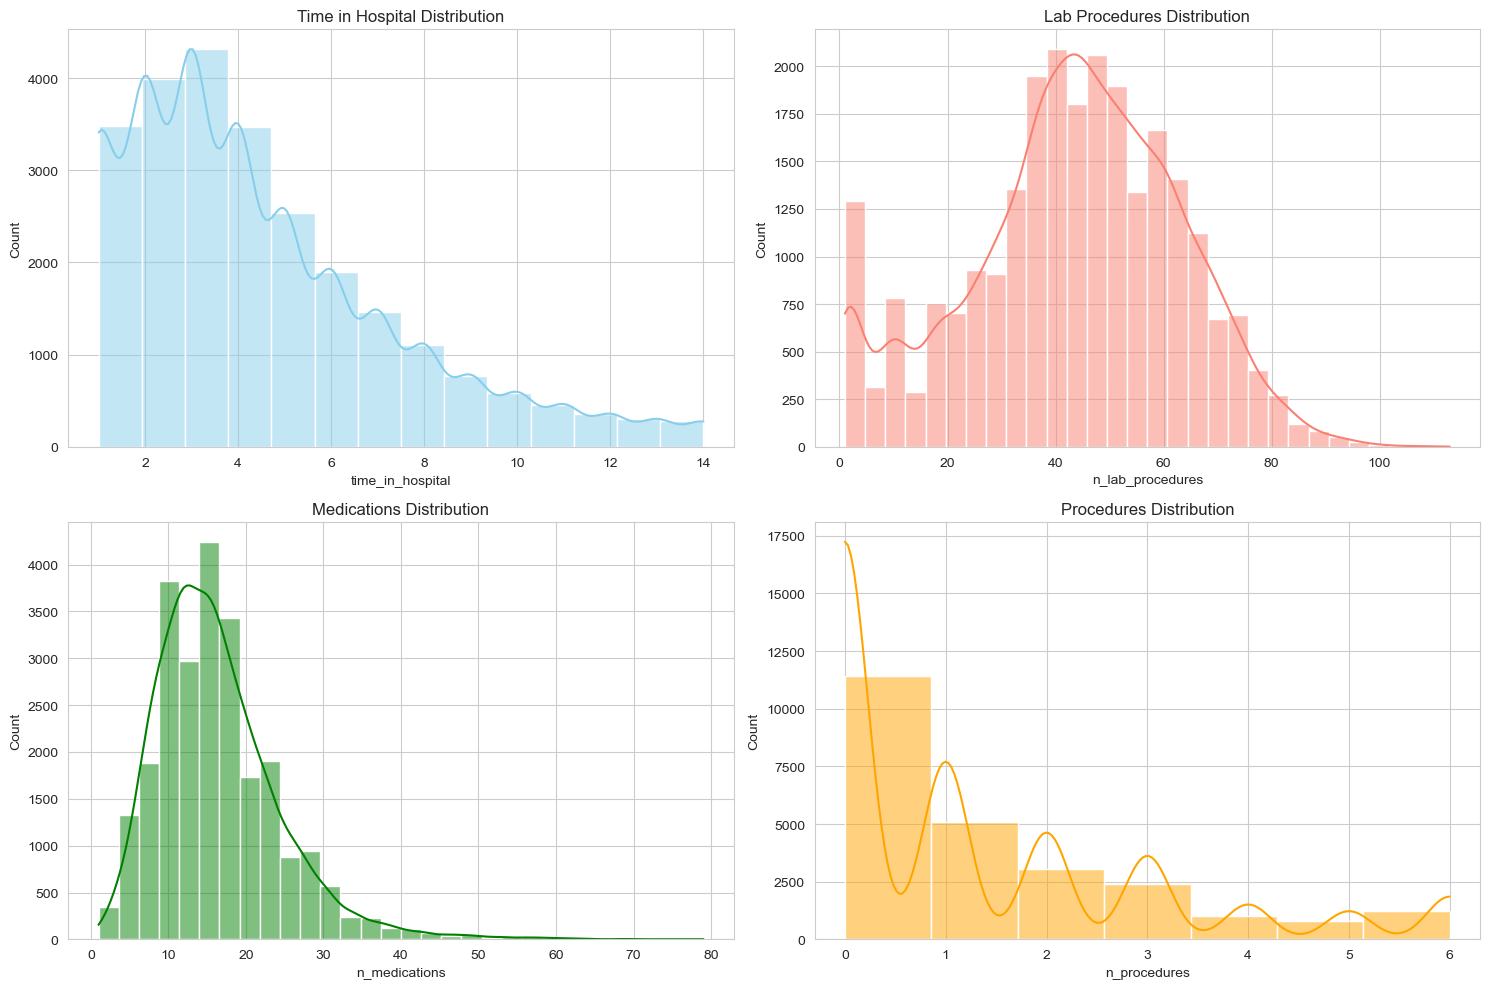

In [621]:
# Visualization 5: Numerical Feature Distributions

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['time_in_hospital'], bins=14, ax=axes[0,0], kde=True, color='skyblue')
axes[0,0].set_title('Time in Hospital Distribution')
sns.histplot(df['n_lab_procedures'], bins=30, ax=axes[0,1], kde=True, color='salmon')
axes[0,1].set_title('Lab Procedures Distribution')
sns.histplot(df['n_medications'], bins=30, ax=axes[1,0], kde=True, color='green')
axes[1,0].set_title('Medications Distribution')
sns.histplot(df['n_procedures'], bins=7, ax=axes[1,1], kde=True, color='orange')
axes[1,1].set_title('Procedures Distribution')
plt.tight_layout()
plt.show()

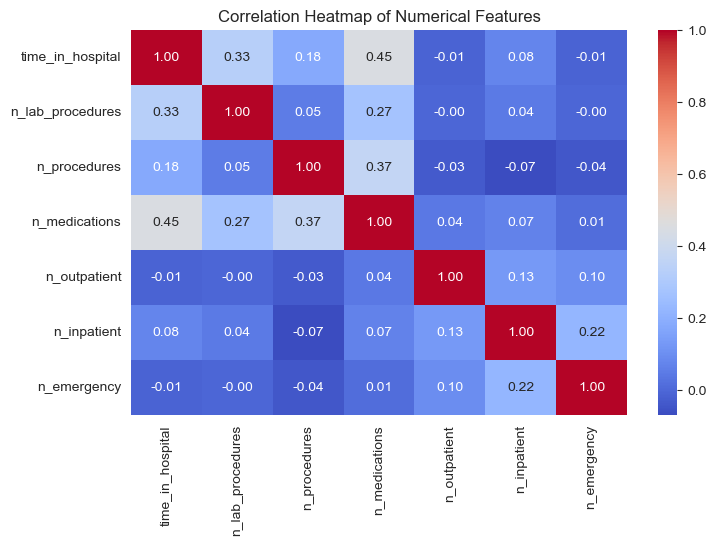

In [622]:
# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include=['int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [623]:
df['readmitted'] = df['readmitted'].map({'yes': 1, 'no': 0})

In [624]:
# Save cleaned data
df.to_csv(r"C:\PROJECTS\Healthcare_Readmission_Analytics\dataset\hospital_readmissions_cleaned.csv", index=False)

In [625]:
# model_train.py

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib

# Load data
df = pd.read_csv(r"C:\PROJECTS\Healthcare_Readmission_Analytics\dataset\hospital_readmissions_cleaned.csv")
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,a1ctest,change,diabetes_med,readmitted
0,75.0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,0
1,75.0,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,0
2,55.0,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,1
3,75.0,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,1
4,65.0,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,0


In [626]:
df['readmitted'].value_counts()

readmitted
0    13246
1    11754
Name: count, dtype: int64

### Preprocessing & Encoding

In [627]:
# Encode categorical columns

encoders = {}
categorical_cols = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'a1ctest', 'change', 'diabetes_med']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [628]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,a1ctest,change,diabetes_med,readmitted
0,75.0,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,0
1,75.0,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,55.0,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
3,75.0,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,1
4,65.0,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0


In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                25000 non-null  float64
 1   time_in_hospital   25000 non-null  int64  
 2   n_lab_procedures   25000 non-null  int64  
 3   n_procedures       25000 non-null  int64  
 4   n_medications      25000 non-null  int64  
 5   n_outpatient       25000 non-null  int64  
 6   n_inpatient        25000 non-null  int64  
 7   n_emergency        25000 non-null  int64  
 8   medical_specialty  25000 non-null  int32  
 9   diag_1             25000 non-null  int32  
 10  diag_2             25000 non-null  int32  
 11  diag_3             25000 non-null  int32  
 12  glucose_test       25000 non-null  int32  
 13  a1ctest            25000 non-null  int32  
 14  change             25000 non-null  int32  
 15  diabetes_med       25000 non-null  int32  
 16  readmitted         250

In [630]:
# Features and target
X = df.drop(columns=['readmitted'])
y = df['readmitted']

In [631]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [632]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [633]:
# Model Accuaracy
print("Model Accuracy:", model.score(X_test, y_test))

Model Accuracy: 0.605


In [634]:
# Save model & encoders
import pickle
with open("readmission_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

print("Model and encoders saved successfully")

Model and encoders saved successfully
